In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from functions import *

In [106]:
df = pd.read_csv('spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [107]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [108]:
df.shape

(32833, 23)

In [109]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [110]:
df[df.duplicated]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


In [111]:
df.isnull().mean().sort_values()

track_id                    0.000000
track_popularity            0.000000
track_album_release_date    0.000000
track_album_id              0.000000
playlist_name               0.000000
playlist_subgenre           0.000000
playlist_genre              0.000000
playlist_id                 0.000000
energy                      0.000000
key                         0.000000
loudness                    0.000000
danceability                0.000000
mode                        0.000000
instrumentalness            0.000000
acousticness                0.000000
speechiness                 0.000000
valence                     0.000000
tempo                       0.000000
duration_ms                 0.000000
liveness                    0.000000
track_artist                0.000152
track_name                  0.000152
track_album_name            0.000152
dtype: float64

**Cleanning and Feature Engineering**

In [112]:
unused_list = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_id', 'playlist_name']
df = df.drop(unused_list, axis=1)
df.dtypes

track_popularity       int64
playlist_genre        object
playlist_subgenre     object
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms            int64
dtype: object

In [113]:
df['duration_sec'] = df['duration_ms'] / 1000
df = df.drop(['duration_ms'], axis=1)

In [114]:
popularity_bin = pd.cut(df['track_popularity'], bins=[-1, 40, 80, 100], labels=['L', 'M', 'H'])
df['popularity_level'] = popularity_bin
df = df.drop(['track_popularity'], axis=1)
df.isnull().mean().sort_values()

playlist_genre       0.0
playlist_subgenre    0.0
danceability         0.0
energy               0.0
key                  0.0
loudness             0.0
mode                 0.0
speechiness          0.0
acousticness         0.0
instrumentalness     0.0
liveness             0.0
valence              0.0
tempo                0.0
duration_sec         0.0
popularity_level     0.0
dtype: float64

In [115]:
df[df['popularity_level'].isnull() == True]

,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec,popularity_level


Checking for Outliers

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_sec'}>]], dtype=object)

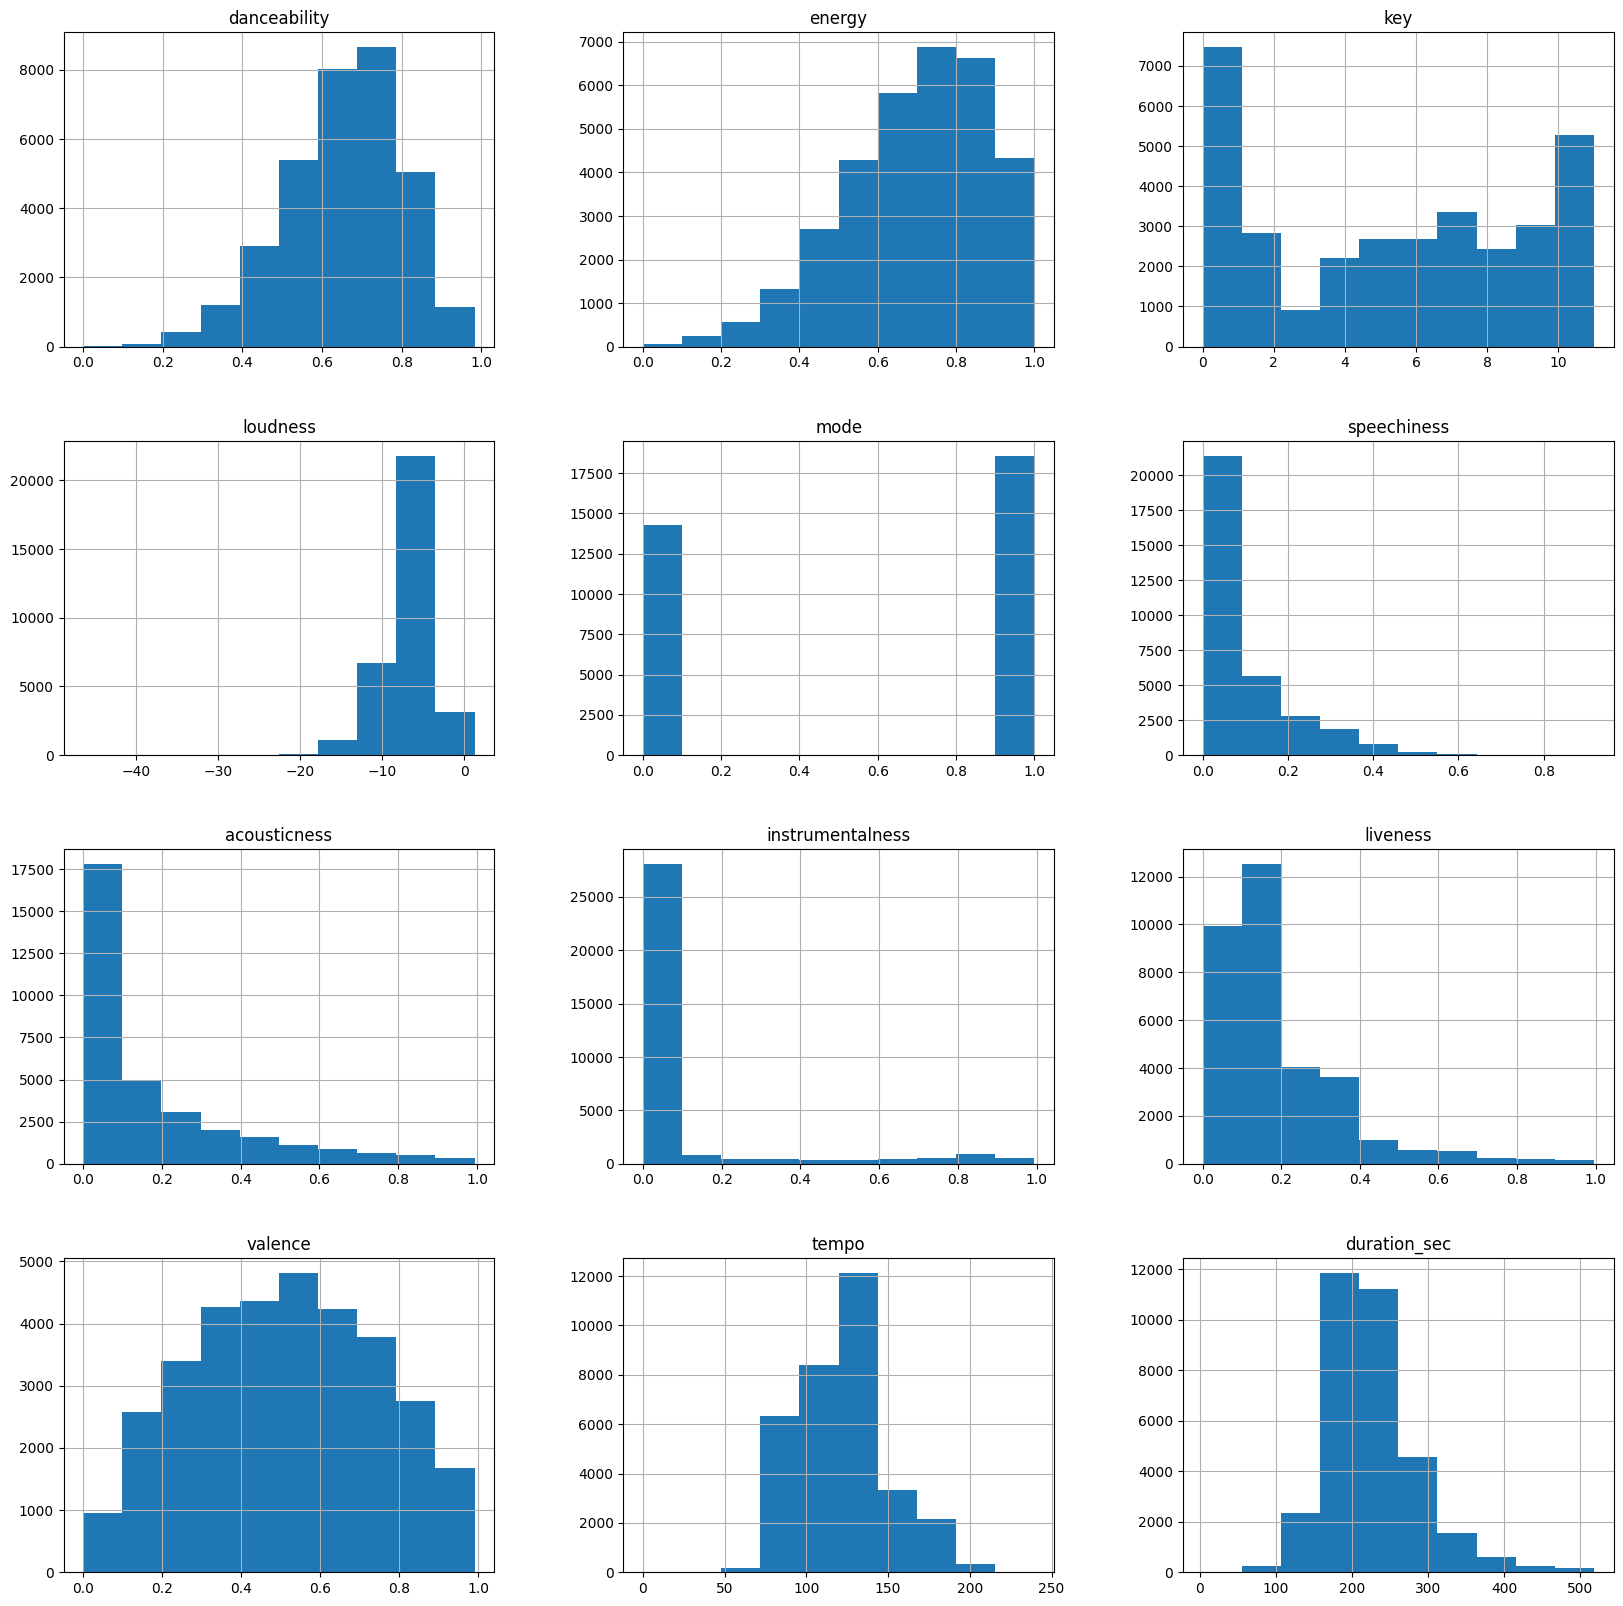

In [116]:
df.hist(figsize=(20, 20))

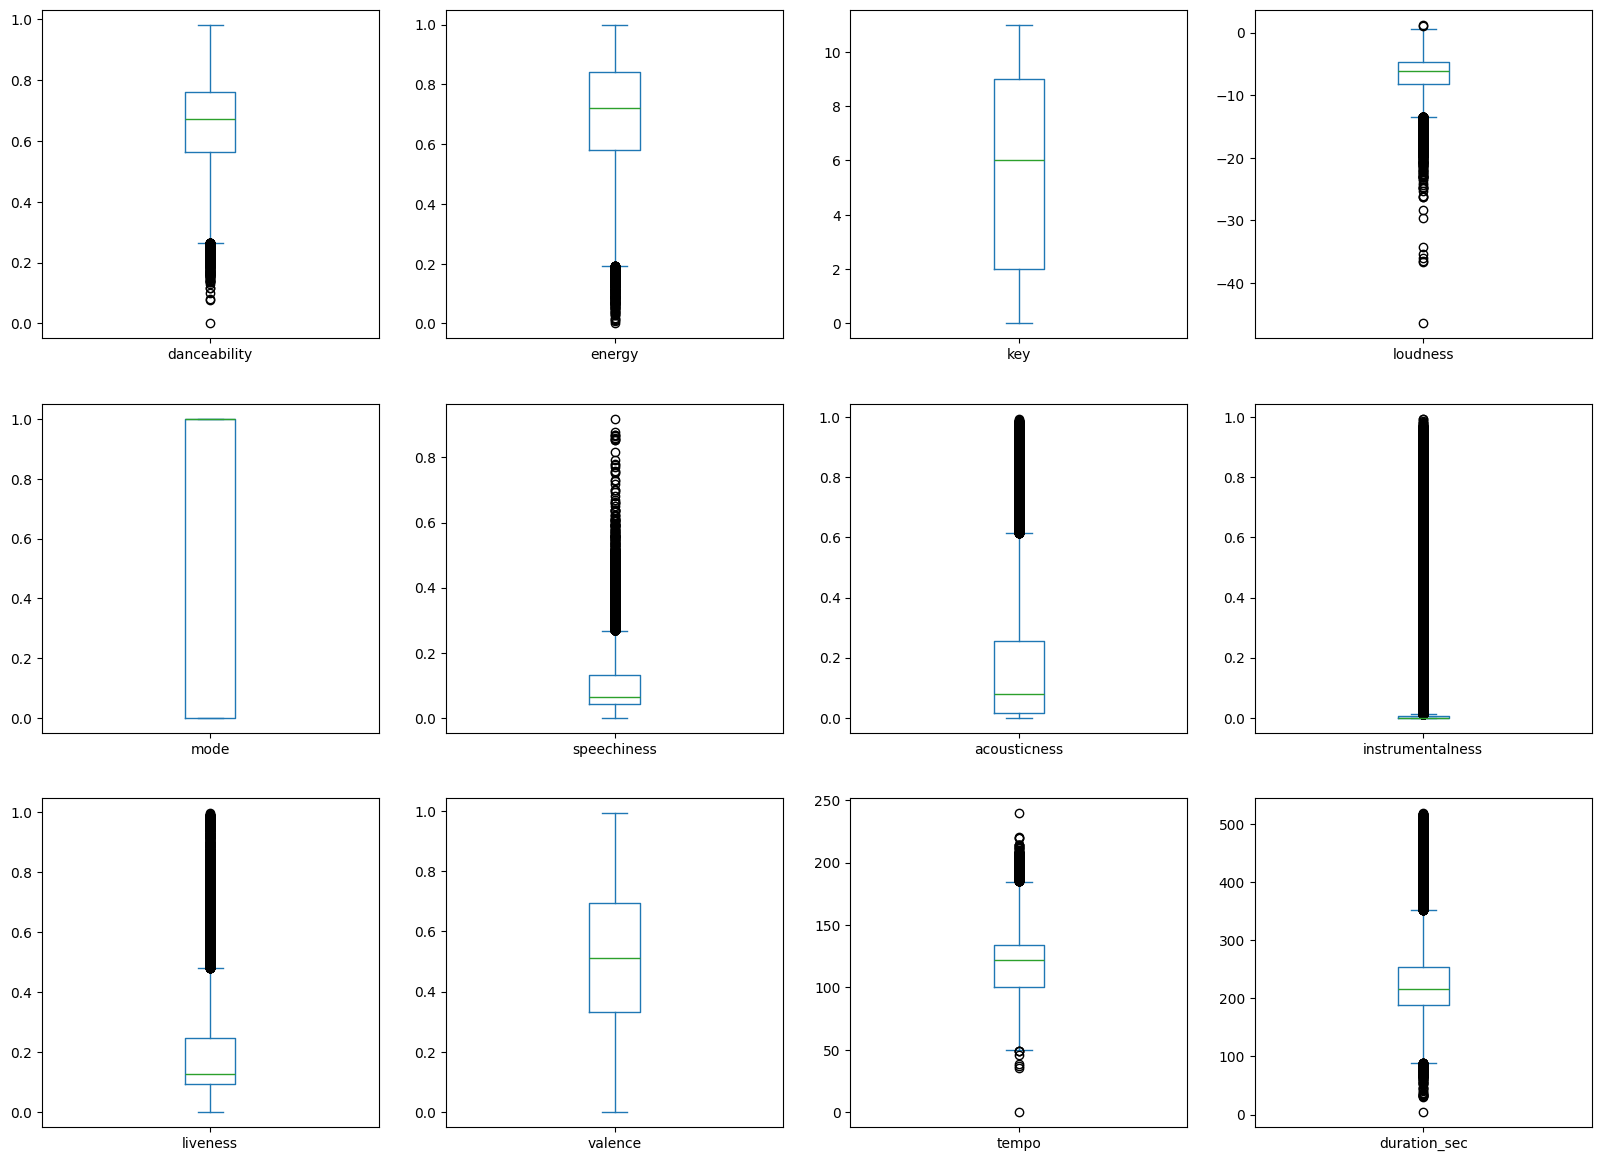

In [117]:
boxPlotAll(df)

In [118]:
df[df['loudness'] > 0]

,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec,popularity_level
9883,rap,gangster rap,0.783,0.929,11,0.551,0,0.0893,0.2000,0.004140,0.6890,0.152,118.030,134.447,M
10438,rap,trap,0.853,0.860,1,0.326,1,0.1340,0.0287,0.000000,0.0744,0.534,135.950,224.812,M
10458,rap,trap,0.878,0.855,9,0.642,1,0.0940,0.0906,0.000000,0.1740,0.330,123.991,112.273,L
12197,rock,album rock,0.345,0.998,8,1.275,1,0.2290,0.0756,0.000018,0.1080,0.280,154.850,256.067,L
27716,edm,electro house,0.725,0.996,0,1.135,1,0.0877,0.1520,0.096300,0.2950,0.355,125.054,215.055,L
30339,edm,pop edm,0.843,0.925,2,0.302,1,0.0997,0.1390,0.000008,0.1090,0.590,159.926,134.769,M


In [119]:
df[df['duration_sec'] < 10]

,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec,popularity_level
11363,rock,album rock,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4.0,L


In [120]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225.799812
std,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59.834006
min,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187.819000
50%,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216.000000
75%,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253.585000
max,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517.810000


In [121]:
genres = pd.get_dummies(df['playlist_genre'])
sub_genres = pd.get_dummies(df['playlist_subgenre'])
genres.columns = ['genre_' + str(col) for col in genres.columns]
sub_genres.columns = ['subgenre_' + str(col) for col in sub_genres.columns]
df = df.join(genres)
df = df.join(sub_genres)
df = df.drop(['playlist_genre', 'playlist_subgenre'], axis=1)
df = df.replace(False, 0)
df = df.replace(True, 1)
df.head()

C:\Users\1\AppData\Local\Temp\ipykernel_61672\2111933166.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(True, 1)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,subgenre_new jack swing,subgenre_permanent wave,subgenre_pop edm,subgenre_post-teen pop,subgenre_progressive electro house,subgenre_reggaeton,subgenre_southern hip hop,subgenre_trap,subgenre_tropical,subgenre_urban contemporary
0,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,...,0,0,0,0,0,0,0,0,0,0
1,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,...,0,0,0,0,0,0,0,0,0,0
2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,...,0,0,0,0,0,0,0,0,0,0
3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,...,0,0,0,0,0,0,0,0,0,0
4,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,...,0,0,0,0,0,0,0,0,0,0


**Exploratory Analysis**

In [122]:
# correlationMatrix(df)

In [123]:
# df.corr().loc['popularity_level'].sort_values()

**Data Modeling (Classification)**

In [136]:
test_size = 0.33
seed = 1

target = 'popularity_level'

In [125]:
# for col in df.columns:
#     if abs(df[col].corr(df['popularity_level'])) > 0.1:
#         print(type(col), 'yes')

In [170]:
# predictors_all = [col for col in df.columns if col != 'popularity_level']
predictors_numeric = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_sec']
predictors_genres = [col for col in df.columns if ('genre' in col) & ('sub' not in col)]
predictors_sub_genres = [col for col in df.columns if 'subgenre' in col]
predictors_all_genres = [col for col in df.columns if 'genre' in col]
# predictors_higher_corr = [col for col in df.columns if (abs(df[col].corr(df['popularity_level'])) > 0.1) & (col != 'popularity_level')]
# predictors_higher_corr2 = [col for col in df.columns if (abs(df[col].corr(df['popularity_level'])) > 0.05) & (col != 'popularity_level')]
predictors_show_biasness = ['duration_sec', 'tempo']
predictors_show_biasness_genre = predictors_show_biasness + predictors_genres
predictors_show_biasness_subgenre = predictors_show_biasness + predictors_sub_genres
predictors_all_biasness = predictors_show_biasness + predictors_all_genres

predictors_list = [predictors_numeric, predictors_genres, predictors_sub_genres, predictors_all_genres, predictors_show_biasness, predictors_show_biasness_genre, predictors_show_biasness_subgenre, predictors_all_biasness]

In [171]:
predictors_dict = {'Predictor': ['Numeric',
                                 'Genres',
                                 'Subgenres',
                                 'Genres + Subgenres',
                                 'Duration + Tempo',
                                 'Duration + Tempo + Genres',
                                 'Duration + Tempo + Subgenres',
                                 'Duration + Tempo + Genres + Subgenres'],
                    'Logistic Regression (MinMax)' : [],
                    'Decision Tree Classifier (MinMax)' : [],
                    'Logistic Regression (Standard)' : [],
                    'Decision Tree Classifier (Standard)' : []}
predictors_dict['Predictor'][0]

'Numeric'

Logistic Regression

In [179]:
for combination in predictors_list:
    print('\n', str(combination))
    y = df[target]
    X = df[combination]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

    scalers = [MinMaxScaler(feature_range=(0, 1)), StandardScaler()]
    for index, scaler in enumerate(scalers):
        X_train = scaler.fit_transform(X_train)
        # y_train = scaler.fit_transform(y_train)
        X_test = scaler.transform(X_test)
        # y_test = scaler.transform(y_test)

        model = LogisticRegression(solver='lbfgs')
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        score = accuracy_score(y_pred=yhat, y_true=y_test)
        if index == 0:
            print('MinMax')
            predictors_dict['Logistic Regression (MinMax)'].append(score)
        elif index == 1:
            print('Standard')
            predictors_dict['Logistic Regression (Standard)'].append(score)
        print('Accuracy score: ', score)


 ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_sec']
MinMax
Accuracy score:  0.5678818643285648
Standard
Accuracy score:  0.5674203968620213

 ['genre_edm', 'genre_latin', 'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock']
MinMax
Accuracy score:  0.5572681125980619
Standard
Accuracy score:  0.5572681125980619

 ['subgenre_album rock', 'subgenre_big room', 'subgenre_classic rock', 'subgenre_dance pop', 'subgenre_electro house', 'subgenre_electropop', 'subgenre_gangster rap', 'subgenre_hard rock', 'subgenre_hip hop', 'subgenre_hip pop', 'subgenre_indie poptimism', 'subgenre_latin hip hop', 'subgenre_latin pop', 'subgenre_neo soul', 'subgenre_new jack swing', 'subgenre_permanent wave', 'subgenre_pop edm', 'subgenre_post-teen pop', 'subgenre_progressive electro house', 'subgenre_reggaeton', 'subgenre_southern hip hop', 'subgenre_trap', 'subgenre_tropical', 'subgenre_urban contemporary']


Desicion Tree Classifier

In [180]:
for combination in predictors_list:
    print('\n', str(combination))
    y = df[target]
    X = df[combination]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

    scalers = [MinMaxScaler(feature_range=(0, 1)), StandardScaler()]
    for index, scaler in enumerate(scalers):
        X_train = scaler.fit_transform(X_train)
        # y_train = scaler.fit_transform(y_train)
        X_test = scaler.transform(X_test)
        # y_test = scaler.transform(y_test)

        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        score = accuracy_score(y_pred=yhat, y_true=y_test)
        if index == 0:
            print('MinMax')
            predictors_dict['Decision Tree Classifier (MinMax)'].append(score)
        elif index == 1:
            print('Standard')
            predictors_dict['Decision Tree Classifier (Standard)'].append(score)
        print('Accuracy score: ', score)


 ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_sec']
MinMax
Accuracy score:  0.59566220581449
Standard
Accuracy score:  0.595016151361329

 ['genre_edm', 'genre_latin', 'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock']
MinMax
Accuracy score:  0.5572681125980619
Standard
Accuracy score:  0.5572681125980619

 ['subgenre_album rock', 'subgenre_big room', 'subgenre_classic rock', 'subgenre_dance pop', 'subgenre_electro house', 'subgenre_electropop', 'subgenre_gangster rap', 'subgenre_hard rock', 'subgenre_hip hop', 'subgenre_hip pop', 'subgenre_indie poptimism', 'subgenre_latin hip hop', 'subgenre_latin pop', 'subgenre_neo soul', 'subgenre_new jack swing', 'subgenre_permanent wave', 'subgenre_pop edm', 'subgenre_post-teen pop', 'subgenre_progressive electro house', 'subgenre_reggaeton', 'subgenre_southern hip hop', 'subgenre_trap', 'subgenre_tropical', 'subgenre_urban contemporary']
Min

**Result**

In [174]:
predictors_df = pd.DataFrame(predictors_dict)
predictors_df

,Predictor,Logistic Regression (MinMax),Decision Tree Classifier (MinMax),Logistic Regression (Standard),Decision Tree Classifier (Standard)
0,Numeric,0.567882,0.595939,0.567420,0.591140
1,Genres,0.557268,0.557268,0.557268,0.557268
2,Subgenres,0.592063,0.592063,0.592063,0.592063
3,Genres + Subgenres,0.592063,0.592063,0.592063,0.592063
4,Duration + Tempo,0.545916,0.582741,0.545824,0.585787
5,Duration + Tempo + Genres,0.564006,0.547670,0.564006,0.548962
6,Duration + Tempo + Subgenres,0.598800,0.522381,0.598708,0.524781
7,Duration + Tempo + Genres + Subgenres,0.597970,0.521735,0.598708,0.522566


<Axes: >

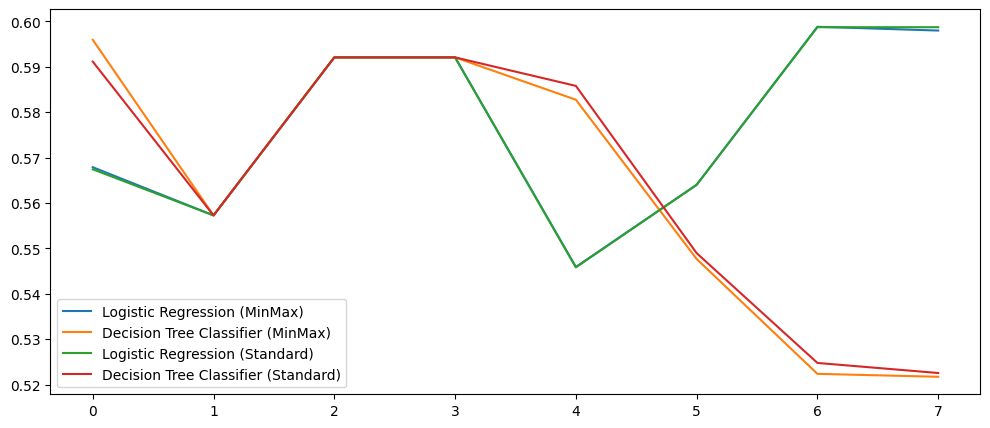

In [177]:
predictors_df.plot(figsize=(12, 5))

In [178]:
# Logistic Regression with MinMaxScaler performs the best with predictor = duration + tempo + subgenres (accuracy score = 0.5988)
